#  Sử dụng mô hình ANN đã có để thực hiện phân loại các loài hoa Iris đã cho trong các bài thực hành trước. Đánh giá độ chính xác của mô hình trong ví dụ này.

In [222]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [223]:
# đọc dữ liệu từ file
data = pd.read_csv("E:\ML\ANN\iris.data", header=None)

# tên các cột
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.columns = columns

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [224]:
# mô tả về dữ liệu
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


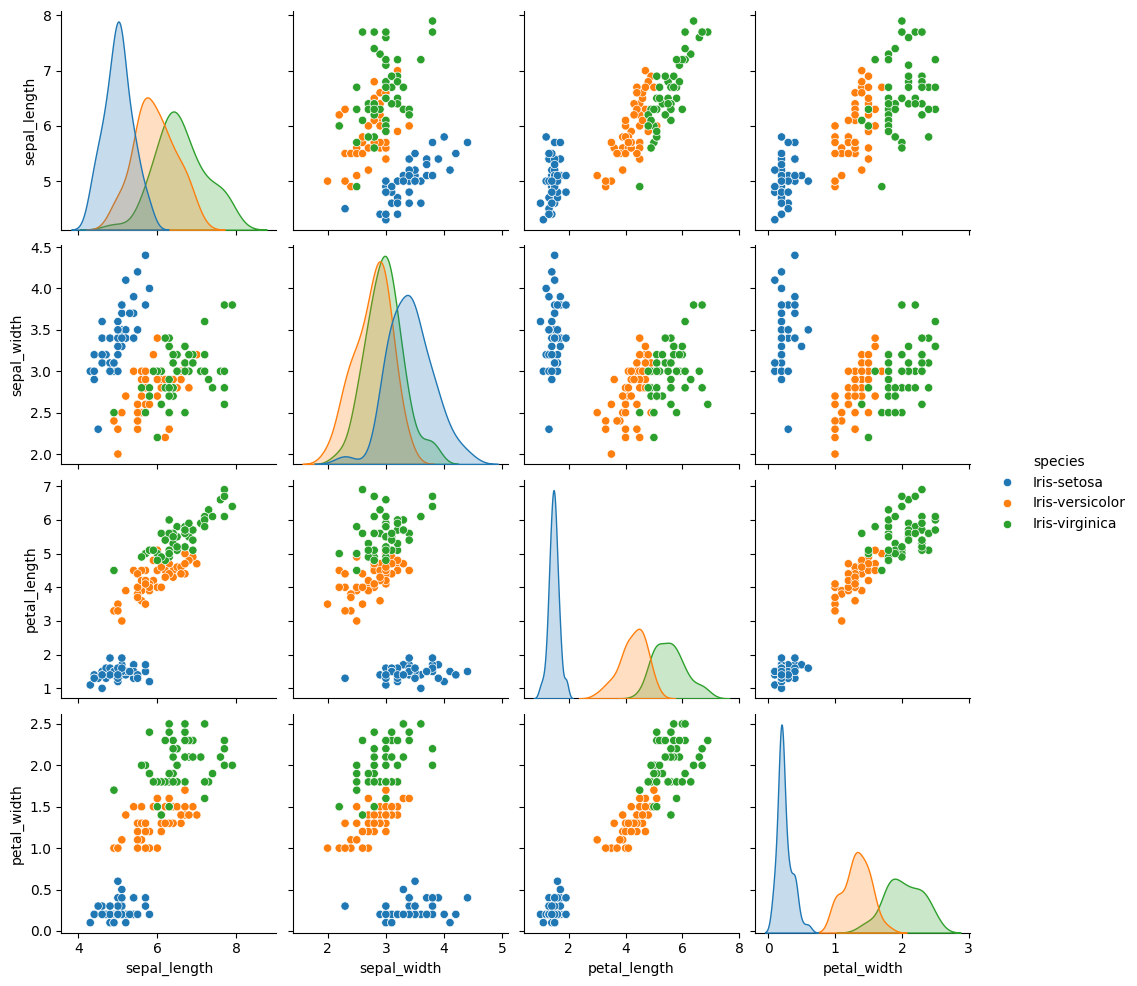

In [225]:
# vẽ các biểu đồ parplot để trực quan hóa mỗi quan hệ giữa từng cặp thuộc tính

import seaborn as sns

sns.pairplot(data = data, hue = "species")
plt.show()

## Giảm chiều dữ liệu để trực quan hóa

In [226]:
X = data.iloc[:,0:4].values
# X = data.drop("species", axis = 1)


print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [227]:
Y = data.iloc[:,4].values
print(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [228]:
print(X.shape)

(150, 4)


In [229]:
print(Y.shape)

(150,)


In [230]:
conditions = [Y == 'Iris-setosa', Y == 'Iris-versicolor']
choices = [0, 1]

Y = np.select(conditions, choices, default=2)

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [231]:
species = data["species"].tolist()

X = data.drop("species", axis = 1)

In [232]:
# Chuẩn hóa dữ liệu 
X = (X - X.mean()) / X.std(ddof=0)

# hoặc có thể dùng
# X = (X - X.min())/(X.max() - X.min())

In [233]:
# thực hiện tính ma trận tương quan 
# mỗi phần tử ở hàng i cột j trong ma trận thể hiện mức độ tương quan giữa feature i và feature j

X_corr = (1 / 150) * X.T.dot(X)

Text(0.5, 1.0, 'Correlation matrix')

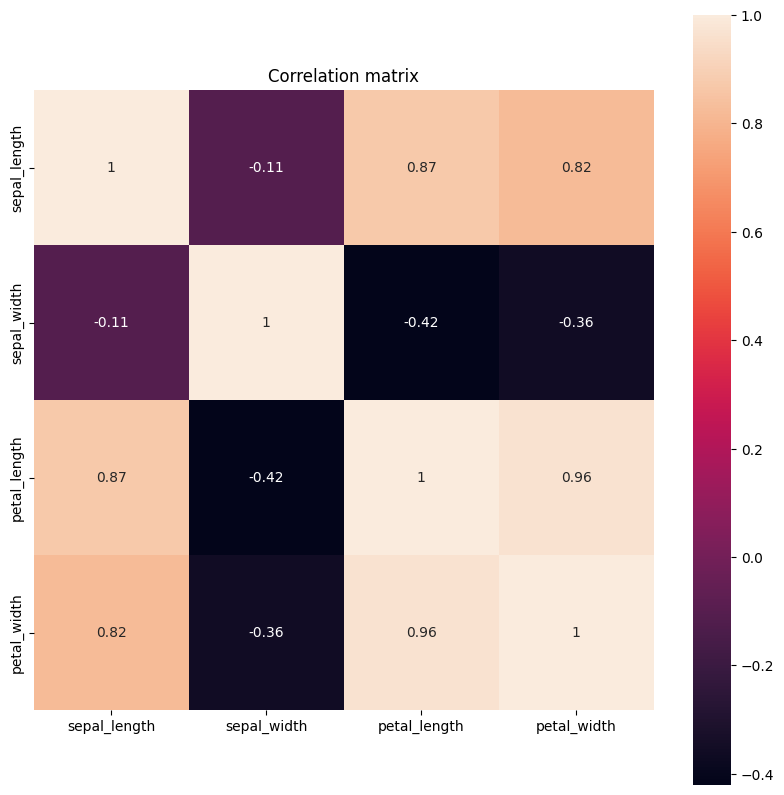

In [234]:
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [235]:
# tính toán các giá trị riêng (eigenvalues) và các vector riêng (eigenvectors) của ma trận tương quan 

u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]))

In [236]:
# cách thứ 2 để tính giá trị riêng và vector riêng: sử dụng hàm svd trogn thư viện numpy

s, u = np.linalg.eig(X_corr)
eig_values, eig_vectors = s,u
eig_values, eig_vectors

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

Text(0.5, 0, 'Dimensions')

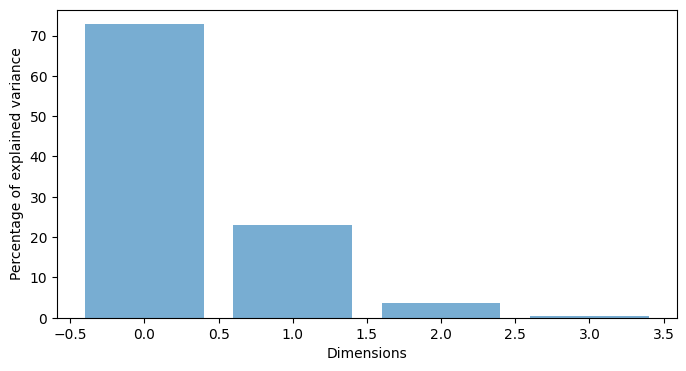

In [237]:
# plotting the variance explained by each PC: vẽ biểu đồ phương sai được giải thích bởi mỗi thành phần chính

explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [238]:
# trong PCa, các thành phần chính PC là các vector riêng ứng với các giá trị riêng của ma trận tương quan hoặc ma trận hiệp phương sai của dữ liệu

# eig_vectors[:, 0]  và eig_vectors[:, 1] là hai vector đầu tiên của ma trận tương quan X_corr


pc1 = X.dot(eig_vectors[:,0]) # kết quả là vector mới: "pc1" là một chều mới trong không gian các điểm dữ liệu được tính toán dựa trên thành phần chính đầu tiên

pc2 = X.dot(eig_vectors[:,1]) # "pc2" là chiều t2 trong không gian các điểm dữ liệu

In [239]:
print(pc1)
print(pc2)

0     -2.264542
1     -2.086426
2     -2.367950
3     -2.304197
4     -2.388777
         ...   
145    1.870522
146    1.558492
147    1.520845
148    1.376391
149    0.959299
Length: 150, dtype: float64
0     -0.505704
1      0.655405
2      0.318477
3      0.575368
4     -0.674767
         ...   
145   -0.382822
146    0.905314
147   -0.266795
148   -1.016362
149    0.022284
Length: 150, dtype: float64


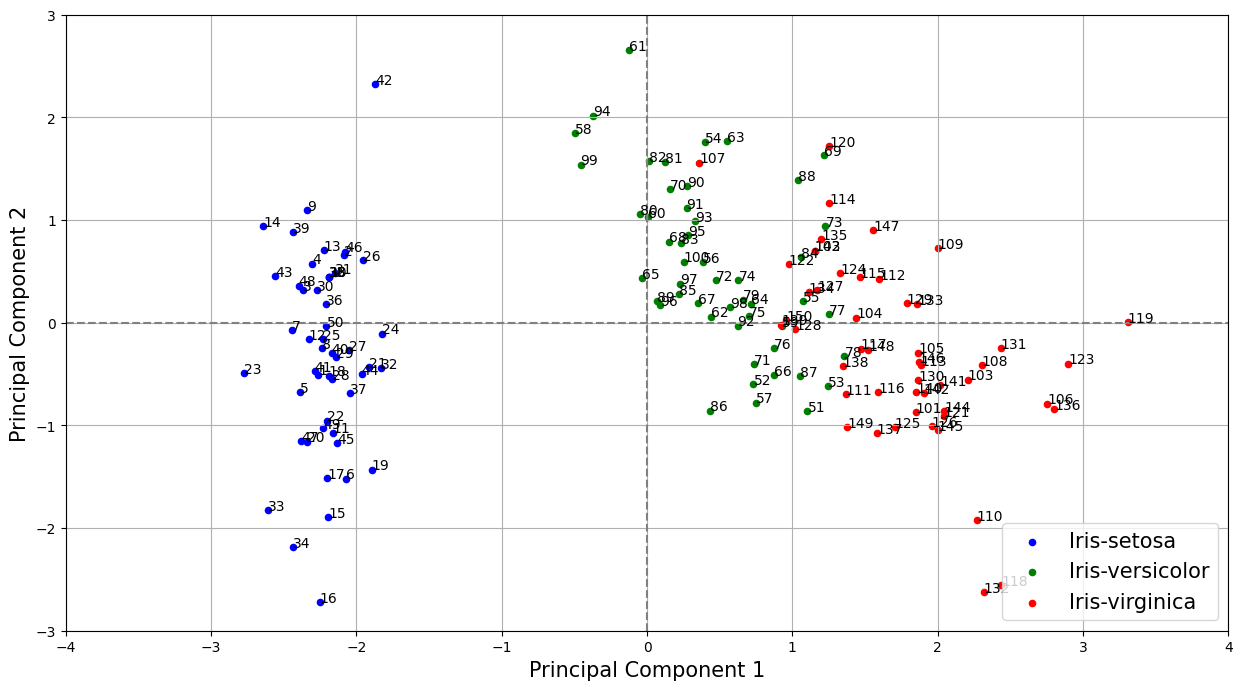

In [240]:


# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
        c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
        
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)

In [241]:
from sklearn.decomposition import PCA

# Khởi tạo một PCA object với số lượng thành phần chính cần giữ lại
pca = PCA(n_components=2)

# Fit và transform dữ liệu vào không gian của các thành phần chính
X_pca = pca.fit_transform(X)

# Lấy các thành phần chính (eigenvectors) từ PCA object
eigenvectors = pca.components_

# Lấy giá trị riêng (explained variance) của các thành phần chính
explained_variance = pca.explained_variance_ratio_

# In ra giá trị riêng và thành phần chính
print("Explained variance:", explained_variance)
print("Eigenvectors (Principal components):", eigenvectors)

Explained variance: [0.72770452 0.23030523]
Eigenvectors (Principal components): [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


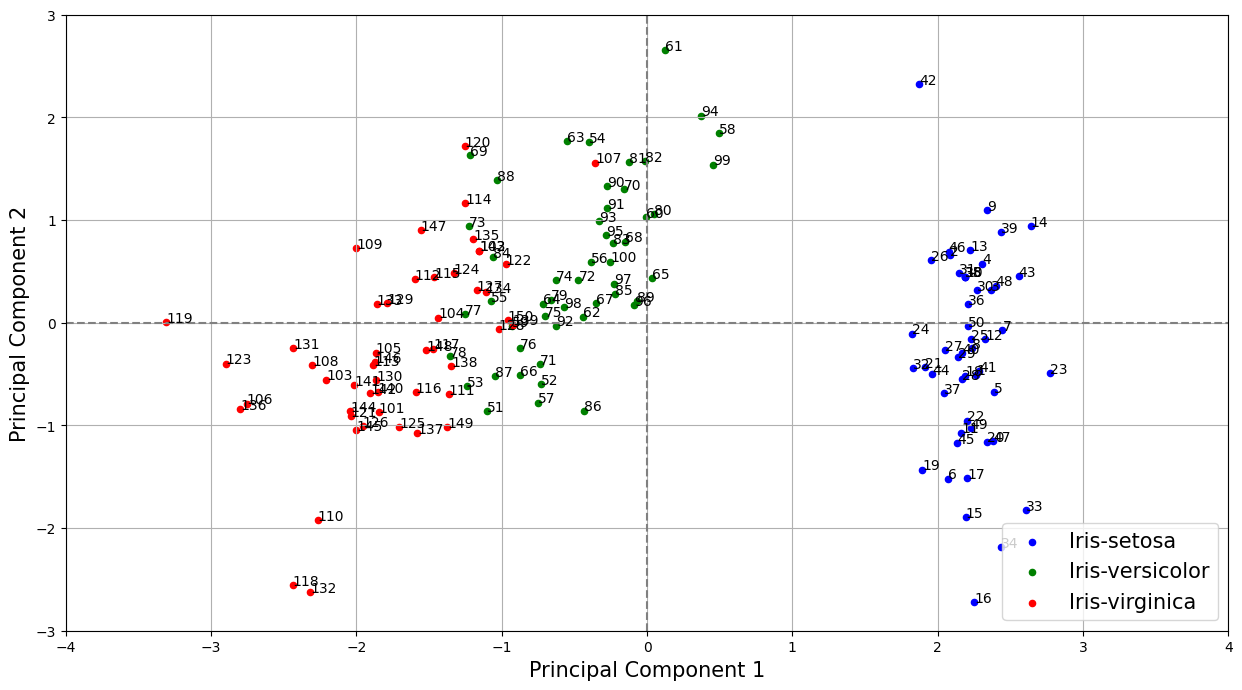

In [242]:
pc1 = - X_pca[:,0]
pc2 = - X_pca[:,1]
plot_scatter(pc1, pc2)

In [243]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [244]:
# định nghĩa hàm softmax
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

In [245]:
# hàm thực hiện tính loss/cost
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [246]:
# biểu diễn đầu ra Y dưới dạng one-hot-coding

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

## Chia dữ liệu theo từng loai hoa

In [247]:
#Read csv data file, change to your location
cols = ["sepal length", "sepal width", "petal length", "petal width", "variety"]
df = pd.read_csv("E:\ML\ANN\iris.data", names =cols)

# Mapping species to numerical values
species_mapping = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

# Replace species values with numerical values
df['variety'] = df['variety'].replace(species_mapping)

print(df)

     sepal length  sepal width  petal length  petal width  variety
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_13468\2383331550.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['variety'] = df['variety'].replace(species_mapping)


In [248]:
# Chia dữ liệu cho từng loại hoa
df_setosa = df[df['variety'] == 0]
df_versicolor = df[df['variety'] == 1]
df_virginica = df[df['variety'] == 2]

In [249]:
# Chia DataFrame Setosa
X_setosa = df_setosa.iloc[:, :4]
y_setosa = df_setosa.iloc[:, 4]   

X_train_setosa, X_test_setosa, y_train_setosa, y_test_setosa = train_test_split(X_setosa, y_setosa, test_size=0.2, random_state=1)

# Chia DataFrame Versicolor
X_versicolor = df_versicolor.iloc[:, :4]  
y_versicolor = df_versicolor.iloc[:, 4]   

X_train_versicolor, X_test_versicolor, y_train_versicolor, y_test_versicolor = train_test_split(X_versicolor, y_versicolor, test_size=0.2, random_state=1)

# Chia DataFrame Virginica
X_virginica = df_virginica.iloc[:, :4]  
y_virginica = df_virginica.iloc[:, 4]   

X_train_virginica, X_test_virginica, y_train_virginica, y_test_virginica = train_test_split(X_virginica, y_virginica, test_size=0.2, random_state=1)

In [250]:
X_train = pd.concat([X_train_setosa, X_train_versicolor, X_train_virginica], axis=0)
y_train = pd.concat([y_train_setosa, y_train_versicolor, y_train_virginica], axis=0)

X_test = pd.concat([X_test_setosa, X_test_versicolor, X_test_virginica], axis=0)
y_test = pd.concat([y_test_setosa, y_test_versicolor, y_test_virginica], axis=0)

In [251]:
X_train.shape

(120, 4)

In [252]:
print(X_train)

     sepal length  sepal width  petal length  petal width
32            5.2          4.1           1.5          0.1
39            5.1          3.4           1.5          0.2
21            5.1          3.7           1.5          0.4
36            5.5          3.5           1.3          0.2
19            5.1          3.8           1.5          0.3
..            ...          ...           ...          ...
109           7.2          3.6           6.1          2.5
108           6.7          2.5           5.8          1.8
112           6.8          3.0           5.5          2.1
143           6.8          3.2           5.9          2.3
137           6.4          3.1           5.5          1.8

[120 rows x 4 columns]


In [253]:
y_train.shape

(120,)

In [254]:
print(y_train)

32     0
39     0
21     0
36     0
19     0
      ..
109    2
108    2
112    2
143    2
137    2
Name: variety, Length: 120, dtype: int64


In [255]:
print(y_test.shape)

(30,)


In [256]:
X_train.shape

(120, 4)

In [257]:
X_train = X_train.T
X_test = X_test.T

In [258]:
print(X_train.shape)
print(X_test.shape)

(4, 120)
(4, 30)


In [259]:
# thiết lập kiến trúc mạng ann

# số unit trong mỗi tầng
d0 = 4 # input
d1 = h = 120 # hidden layer
d2 = C = 3 # output
N = X_train.shape[1] # number of samples

# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1) # ma trận trọng số giữa input và hidden layer
b1 = np.zeros((d1, 1)) # vector bias tương ứng

W2 = 0.01*np.random.randn(d1, d2) # ma trận trọng số giữa hidden layer và output layer
b2 = np.zeros((d2, 1))

Y = convert_labels(y_train, C)
eta = 0.01 # learning rate

In [260]:
print(N)

120


In [261]:
for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X_train) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(y_train, Yhat)
        print("iter %d, loss: %f" %(i, loss))
    # backpropagation
    E2 = (Yhat - y_train )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X_train, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

ValueError: Length of values (3) does not match length of index (120)

In [ ]:
Z1 = np.dot(W1.T, X_train) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y_train)
print('training accuracy: %.2f %%' % (acc))

In [ ]:
# dự đoán trên tập test
# Test
Z1 = np.dot(W1.T, X_test) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y_test)
print('test accuracy: %.2f %%' % (acc))